Este código cria uma grade bidimensional com 50x50 pontos. As condições de contorno são definidas com um potencial de 5 volts na borda superior e zero nas outras bordas. O método das diferenças finitas é aplicado para calcular o potencial elétrico em cada ponto da grade. A condição de parada é quando a diferença máxima entre iterações consecutivas do potencial é menor que uma tolerância definida. O resultado é uma distribuição de potencial elétrico 2D, que é visualizada ao final do código.

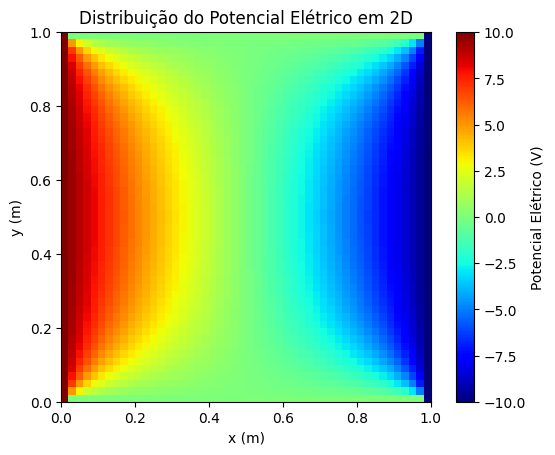

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
N_x, N_y = 50, 50  # Número de pontos na grade (x, y)
L_x, L_y = 1.0, 1.0  # Dimensões da área (metros)
V_left = 10.0  # Potencial na borda esquerda (volts)
V_right = -10.0  # Potencial na borda direita (volts)
max_iter = 3000  # Número máximo de iterações
tolerance = 1e-5  # Tolerância para a convergência

# Criação da grade
x = np.linspace(0, L_x, N_x)
y = np.linspace(0, L_y, N_y)
V = np.zeros((N_x, N_y))  # Inicializa o potencial com zero

# Condições de contorno
V[:, 0] = V_left  # Potencial fixo na borda esquerda
V[:, -1] = V_right  # Potencial fixo na borda direita

# Método das diferenças finitas
for _ in range(max_iter):
    V_old = V.copy()
    for i in range(1, N_x-1):
        for j in range(1, N_y-1):
            V[i, j] = 0.25 * (V_old[i+1, j] + V_old[i-1, j] + V_old[i, j+1] + V_old[i, j-1])

    # Checa a convergência
    if np.max(np.abs(V - V_old)) < tolerance:
        break

# Plotando o resultado
plt.imshow(V, extent=[0, L_x, 0, L_y], origin='lower', cmap='jet')
plt.colorbar(label='Potencial Elétrico (V)')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Distribuição do Potencial Elétrico em 2D')
plt.show()


A fórmula `V[i, j] = 0.25 * (V_old[i+1, j] + V_old[i-1, j] + V_old[i, j+1] + V_old[i, j-1])` usada no código é uma aplicação do método das diferenças finitas em duas dimensões para resolver a equação de Laplace, que em um contexto eletrostático, é expressa como:

$$ \nabla^2 V = 0 $$

Neste caso, a equação de Laplace para o potencial elétrico `V` em duas dimensões pode ser aproximada usando diferenças finitas como:

$$ \frac{V_{i+1, j} - 2V_{i, j} + V_{i-1, j}}{\Delta x^2} + \frac{V_{i, j+1} - 2V_{i, j} + V_{i, j-1}}{\Delta y^2} = 0 $$

Assumindo que `Δx = Δy`, a equação pode ser simplificada para:

$$ V_{i+1, j} - 4V_{i, j} + V_{i-1, j} + V_{i, j+1} + V_{i, j-1} = 0 $$

Reorganizando os termos, obtemos:

$$ V_{i, j} = \frac{1}{4} (V_{i+1, j} + V_{i-1, j} + V_{i, j+1} + V_{i, j-1}) $$

Isso implica que, em um estado estacionário, o potencial elétrico em um ponto `(i, j)` é a média aritmética dos potenciais dos pontos adjacentes. Este princípio reflete a propriedade física de que, num condutor em equilíbrio eletrostático, o potencial em um ponto é igual à média dos potenciais ao seu redor.
